In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 

sns.set()
# https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [2]:
#data = pd.read_csv("Tetuan_City_power_consumption.csv")
data = pd.read_csv("Tetuan_City_power_consumption.csv" ) # ,index_col='DateTime')  # Should I switche the index to Datetime?
data.columns = data.columns.str.replace(' ','_')
#data['DateTime'] = pd.to_datetime(data['DateTime'])
data

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind_Speed                 52416 non-null  float64
 4   general_diffuse_flows      52416 non-null  float64
 5   diffuse_flows              52416 non-null  float64
 6   Zone_1_Power_Consumption   52416 non-null  float64
 7   Zone_2__Power_Consumption  52416 non-null  float64
 8   Zone_3__Power_Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [4]:
data.DateTime = pd.to_datetime(data.DateTime)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind_Speed                 52416 non-null  float64       
 4   general_diffuse_flows      52416 non-null  float64       
 5   diffuse_flows              52416 non-null  float64       
 6   Zone_1_Power_Consumption   52416 non-null  float64       
 7   Zone_2__Power_Consumption  52416 non-null  float64       
 8   Zone_3__Power_Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
data.set_index('DateTime', inplace=True)

# Zone 1

In [7]:
data_zone1 = data[['Zone_1_Power_Consumption']]

In [8]:
# Changing frequency to daily
data_zone1 = data_zone1.resample('D').sum()

In [9]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


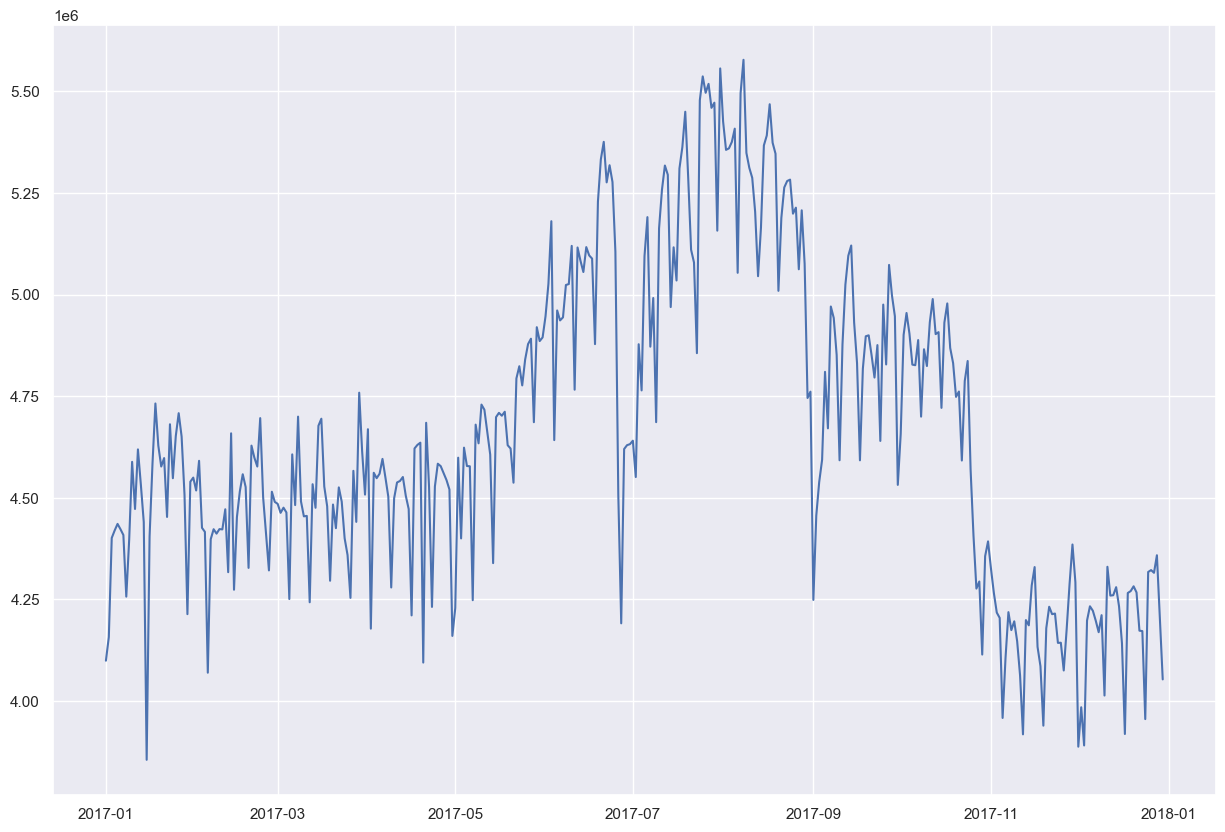

In [10]:
fig =plt.figure(figsize=(15,10))
plt.plot(data_zone1)

# Arima Model

### Checking for seanality

In [ ]:
# %pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Question about perioud and freq
#data_zone1.index.freq = 'YS'

# Specify multiplicative model  
fig = seasonal_decompose(data_zone1['Zone_1_Power_Consumption'],model='mul').plot();
fig.set_size_inches((12, 9))
plt.show()

![](assets/pd_offset_codes.png)

In [ ]:
type(data_zone1)

In [ ]:
data_zone1

In [ ]:
# %pip install pmdarima

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX 
# from pmdarima import auto_arima 

# def time_series_analysis( data, column, test_size, seasonal_status=False, seasonal_period=1 ):
#     df_ = data[[column]]
    
#     #Spliting data to train and test
#     train_test_cutoff = int(len(df_)*(1-test_size))
#     train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
#     test = df_.iloc[train_test_cutoff:]
    
#     # Finding best parameter
     
#     best_fit = auto_arima(df_[[column]],trace=True ,
#                           seasonal=seasonal_status, m=seasonal_period, error_action='ignore')
    
#     # Fitting our ARIMA or SARIMA model 
#     from statsmodels.tsa.arima.model import ARIMA
    
    
#     if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
#         model = SARIMAX(train[column].astype(float), 
#                         order=best_fit.order, 
#                         seasonal_order=best_fit.seasonal_order).fit()
#     else:
#         model = ARIMA(train[column].astype(float), order=best_fit.order).fit() # best_fit.order is getting the order of the best fitted model from line above
#     # Casting the training data as float is not a required step
#     # This is to prevent us from getting a dtype error when predicting 

#     # Predicting 

#     # We want to start our predictions at the end of our training data 
#     start = len(train)

#     # We want to predict our entire DF - 1 because the end is inclusive. 
#     # Our df has 264 rows, but rows start at 0 and end at row 263 
#     end = len(train) + len(test) - 1

#     predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{best_fit.order}')
    
    
#     # Plotting our predictions 

#     test[column].plot(figsize=(12,8), legend=True)
#     predictions.plot(legend=True);
#     plt.show()
    
#     # Model Evaluation 
#     from statsmodels.tools.eval_measures import rmse

#     print(f'rmse: {rmse(test[column],predictions)}')
#     # We can also compare the mean values for our predictions and mean values for the test set to see how we 
#     # are doing

#     print(f'Test Mean: {test[column].mean()}')
#     print(f'Prediction Mean: {predictions.mean()}')
    
#     if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

#         full_data_model =SARIMAX(df_[column].astype(float), 
#                                                     order=best_fit.order, 
#                                                     seasonal_order=best_fit.seasonal_order).fit()
#     else:
            
#         full_data_model = ARIMA(df_[column].astype(float), order=best_fit.order,).fit()

#     #model.summary()

#     forecast = full_data_model.predict(start=len(df_), end=len(df_)+11, typ='levels').rename('ARIMA Forecast')

#     df_[column].plot(legend=True,figsize=(12,6))
#     forecast.plot(legend=True);
    

In [ ]:
# time_series_analysis( data_zone1, column='Zone_1_Power_Consumption', test_size=0.2, seasonal_status=True, seasonal_period=7 )

## Step by Step approach

In [ ]:
df_ = data_zone1[['Zone_1_Power_Consumption']]
test_size = 0.15
column = 'Zone_1_Power_Consumption'
seasonal_status =True
seasonal_period = 7

In [ ]:
#Spliting data to train and test
train_test_cutoff = int(len(df_)*(1-test_size))
train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
test = df_.iloc[train_test_cutoff:]

In [ ]:
# test

In [ ]:
# Finding best parameter

best_fit = auto_arima(df_[[column]],trace=True ,
                      information_criterion='aic',
                      seasonal=seasonal_status,
                      D=1,
                      m=seasonal_period, 
                      error_action='ignore')

# best_fit = auto_arima(df_[[column]], 
#                          start_p=1, start_q=1,  
#                          test='adf',
#                          #max_p=3, max_q=3, 
#                          m=7,
#                          start_P=0, 
#                          #max_P=3, max_Q=3,
#                          seasonal=True,
#                          d=None, 
#                          D=1, max_D=2,
#                          trace=True,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True,
#                          maxiter=80)

# data, start_p=1, start_q=1,
#                          test='adf',
#                          max_p=3, max_q=3, m=7,
#                          start_P=0, seasonal=True,
#                          d=None, D=1, trace=True,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True

#ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=9703.383, Time=0.60 sec

In [ ]:
order_ = best_fit.order
seasonal_order_ = best_fit.seasonal_order
# ARIMA(3,0,3)(1,2,3)[7] 
#ARIMA(3,0,1)(2,1,2)[7] intercept   : AIC=9649.417, Time=4.45 sec
#ARIMA(3,0,4)(1,1,1)[7] intercept   : AIC=9643.436, Time=2.04 sec
#(3, 0, 2)

# order_ = (2,0,2)
# seasonal_order_ = (1,1,2,7)

In [ ]:
order_

In [ ]:
seasonal_order_

In [ ]:
if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
        model = SARIMAX(train[column].astype(float), 
                        order= order_, 
                        seasonal_order= seasonal_order_).fit()
        print("SARIMAX model")
else:
        model = ARIMA(train[column].astype(float), order=order_).fit()
        print("ARIMA model")
# model = SARIMAX(train[column].astype(float), 
#                         order=order_, 
#                         seasonal_order_=seasonal_order_).fit()

In [ ]:
# Predicting 

# We want to start our predictions at the end of our training data 
start = len(train)

# We want to predict our entire DF - 1 because the end is inclusive. 
# Our df has 264 rows, but rows start at 0 and end at row 263 
end = len(train) + len(test) - 1

predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{order_}')

In [ ]:
# predictions

In [ ]:
# Plotting our predictions 

test[column].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True);
plt.show()

In [ ]:
# Model Evaluation 
from statsmodels.tools.eval_measures import rmse

print(f'rmse: {rmse(test[column],predictions)}')
# We can also compare the mean values for our predictions and mean values for the test set to see how we 
# are doing

print(f'Test Mean: {test[column].mean()}')
print(f'Prediction Mean: {predictions.mean()}')

if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

    full_data_model =SARIMAX(df_[column].astype(float), 
                                                order=order_, 
                                                seasonal_order=seasonal_order_).fit()
else:

    full_data_model = ARIMA(df_[column].astype(float), order=order_,).fit()



In [ ]:
forecast = full_data_model.predict(start=len(df_), end=len(df_)+7, typ='levels').rename('ARIMA Forecast')

df_[column].plot(legend=True,figsize=(12,6))
forecast.plot(legend=True);

# Recurrent Neural Network

In [11]:
import tensorflow as tf

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
#warnings.filterwarnings('ignore')

In [12]:
# data_zone1.head(15)

In [13]:
data_zone1.index.freq

<Day>

In [14]:
df_rnn = data_zone1[['Zone_1_Power_Consumption']]
test_size = 0.15

num = 7

#Spliting data to train and test
#train_test_cutoff = int(len(df_)*(1-test_size))
train_test_cutoff = -(num)
train_rnn = df_rnn.iloc[:train_test_cutoff] # Drop the last 27 years of our data
test_rnn = df_rnn.iloc[train_test_cutoff:]

In [15]:
# Scale our data

scaler = MinMaxScaler()

scaler.fit(train_rnn) # Fit only to training

scaled_train = scaler.transform(train_rnn)
scaled_test = scaler.transform(test_rnn)

In [16]:
scaled_train.shape

(357, 1)

In [17]:
scaled_test.shape

(7, 1)

In [18]:
# Time Series Generator - Generates batches that retain their sequences 
# Batches of 7 Days + the resulting value for day 8

ts_generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                   ###########
                                   length=num, 
                                   ##########
                                   batch_size=1)
#ts_generator[0]

In [ ]:
# Same values as above

# scaled_train[:num+1]

# Model

In [19]:
n_features = 1
n_input = 7
n_input = num

model_rnn = Sequential()
model_rnn.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_rnn.add(LSTM(100, activation='relu'))


model_rnn.add(Dense(1))

In [20]:
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.fit_generator(generator = ts_generator, epochs=10)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(model_rnn.history.history['loss'])
plt.legend(labels='MSE')

In [ ]:
rnn_predictions= []
##########
current_data = scaled_train[-(num):].reshape((1, num,1))
for i in range(num):
    current_prediction = model_rnn.predict(current_data)[0]
    rnn_predictions.append(current_prediction)
#     print('first\n',current_data)
#     print('pred\n',current_prediction)
    current_data= np.append(current_data[:,1:,:],[[current_prediction]],axis=1)
#     print('second\n',current_data)
    

In [ ]:
inversed_preds = scaler.inverse_transform(rnn_predictions)
test_rnn['pred']=inversed_preds
test_rnn

In [ ]:
# Training root mean squared error 

print(f"Test RMSE: {np.sqrt(mean_squared_error(test_rnn['Zone_1_Power_Consumption'],test_rnn['pred']))}")

In [ ]:
# Visualize our predicted and our test values 

test_rnn.plot(figsize=(12,4));

# num=14 neurons =100

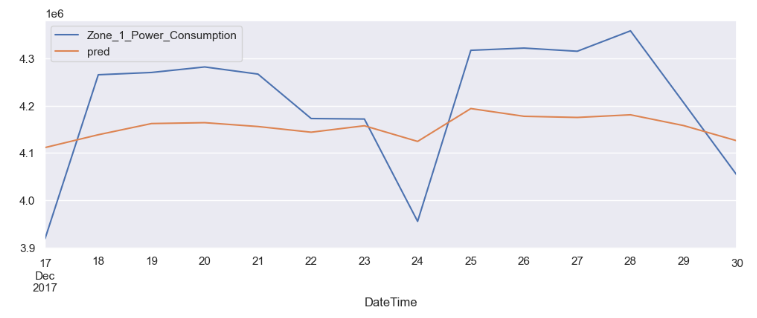

In [ ]:
# Generate Days of predictions

#n_future = 14

future_preds = []

current_data = scaled_test.reshape((1, num, 1)) #Grab last 12 months of training

for i in range(num): 
    
    # This is our prediction for 1 timestep into the future
    current_prediction = model_rnn.predict(current_data)[0]
    
    # Append it to our list of prediction
    future_preds.append(current_prediction)
    
    # Update current_data. Shift the data over by 1 and append the prediction 1 timestep into the future
    current_data = np.append(current_data[:,1:,:],[[current_prediction]],axis=1)

future_preds

In [ ]:
# Inverse the scaling of our predictions

inv_future_preds = np.round(scaler.inverse_transform(future_preds)).reshape(num).astype(int)

inv_future_preds

In [ ]:
# Add out forecasted passengers to a df with a datetime index
import datetime
start=pd.Timestamp('12-31-2017')

future_df = pd.DataFrame(inv_future_preds,index=pd.date_range(start=start,end=start+pd.Timedelta(days=num-1), freq='D'),columns=['forecast'])
future_df

In [ ]:
# import datetime
# start=pd.Timestamp('12-31-2017')
# start+pd.Timedelta(days=num)

In [ ]:
# Plot our forecased energy consumptipon for the next days

ax = plt.plot(df_rnn['Zone_1_Power_Consumption']), plt.plot(future_df)

plt.legend(labels=['Zone_1_Power_Consumption','forecast']);

# num= 14 neurons =100
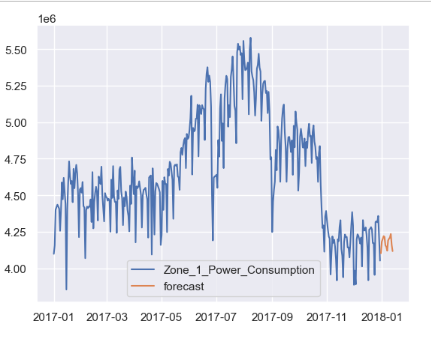

# Cross Validation

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [21]:
df_rnn_cv = data_zone1[['Zone_1_Power_Consumption']]
# test_size = 0.15

# num = 7

# #Spliting data to train and test
# #train_test_cutoff = int(len(df_)*(1-test_size))
# train_test_cutoff = -(num)
# train_rnn = df_rnn.iloc[:train_test_cutoff] # Drop the last 27 years of our data
# test_rnn = df_rnn.iloc[train_test_cutoff:]

In [24]:
n_input = 7
epochs = 1
tscv = TimeSeriesSplit(n_splits = 4)
mse = []
rmse = []
mae = []
mape = []
r_2 = []
for train_index, test_index in tscv.split(df_rnn_cv):
    train_cv, test_cv = df_rnn_cv.iloc[train_index], df_rnn_cv.iloc[test_index]
    # Arima Model
    #model = ARMA(cv_train.value, order=(0, 1)).fit()
    # RNN Model
    
    # Scale our data

    scaler = MinMaxScaler()
    scaler.fit(train_cv) # Fit only to training

    scaled_train_cv = scaler.transform(train_cv)
    scaled_test_cv = scaler.transform(test_cv)
    
    print('scaled_train_cv shape=',scaled_train_cv.shape)
    print('scaled_test_cv shape=',scaled_test_cv.shape)
    
    ts_generator_cv = TimeseriesGenerator(scaled_train_cv, scaled_test_cv, 
                                   ###########
                                   length=n_input, 
                                   ##########
                                   batch_size=1)
    
    
    model_rnn.fit_generator(generator = ts_generator_cv, epochs=epochs)
    
    
    rnn_predictions_cv= []
    ##########
    current_data_cv = scaled_train_cv[-(n_input):].reshape((1, n_input,1))
    for i in range(n_input):
        current_prediction_cv = model_rnn.predict(current_data_cv)[0]
        rnn_predictions_cv.append(current_prediction_cv)
    #     print('first\n',current_data)
    #     print('pred\n',current_prediction)
        current_data_cv= np.append(current_data_cv[:,1:,:],[[current_prediction_cv]],axis=1)
    #     print('second\n',current_data)


#     # Prediction
#     predictions = model.predict(cv_test.index.values[0], cv_test.index.values[-1])
    # Inversing scaled predictions
    predictions = scaler.inverse_transform(rnn_predictions_cv)
    true_values = cv_test.value
    
    # Accuracy metrics
    mse.append(mean_squared_error(true_values, predictions))
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    mae.append(mean_absolute_error(true_values, predictions))
    mpae.append(mean_absolute_percentage_error(true_values, predictions))
    r_2.append(r2_score(true_values, predictions))

scaled_train_cv shape= (76, 1)
scaled_test_cv shape= (72, 1)


ValueError: Data and targets have to be of same length. Data length is 76 while target length is 72

## Here is the screen shot of the error I am facing,
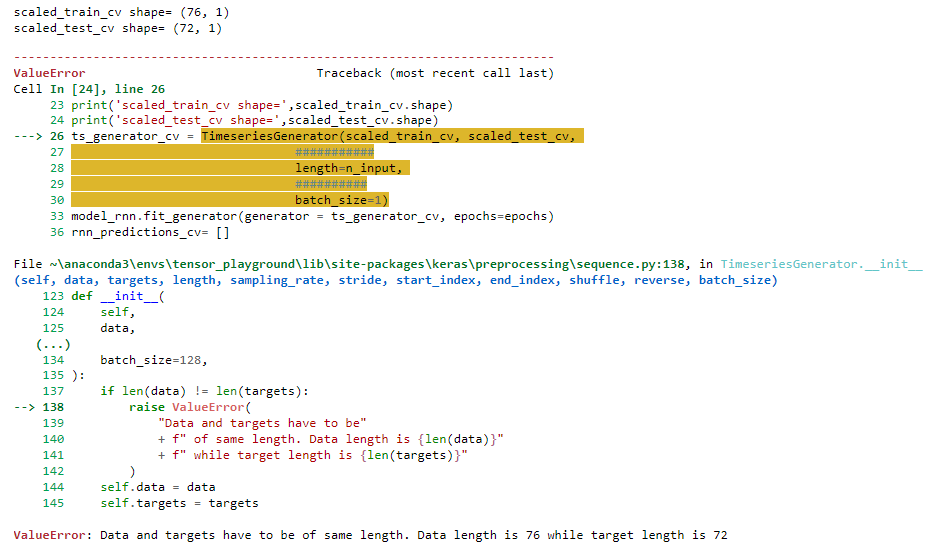

In [ ]:
# #How does TimeSeriesSplit work?
# n=1
# for train_index, test_index in tscv.split(df_rnn_cv):
#     print('n=',n)
#     n+=1
#     print('\ntrain_index=',train_index)
#     print('\nlen train_index=',len(train_index))
#     print('\ntest_index=',test_index)
#     print('\nlen test_index=',len(test_index))
    